# Auto Annotate by trained model

Yolo の機能の一つに SAM を使った自動 Annotation がある
トレーニング済みのモデルと SAM のモデルを指定すると、それを使って画像に対してラベリングができる
中の処理的には、Yolo を使って検知したモデルを SAM で Segmentation して Annotation として出力している感じ

最初に適当なモデルを作ってから学習データを増やすような用途に向いている。

In [5]:
from ultralytics import YOLO

# モデルをロード
model = YOLO('yolov8n.pt')  # 公式モデルをロード
print(model.names)

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

In [13]:
from ultralytics.data.annotator import auto_annotate

auto_annotate(data="../dataset/sumi", det_model="yolov8n.pt", sam_model='sam_b.pt', output_dir="../dataset/sumi_labels")


image 1/470 c:\Users\hamada\workspace\labo\segmentation\notebooks\..\dataset\sumi\PXL_20230306_100502424.jpg: 480x640 1 cat, 1 bowl, 16.0ms
image 2/470 c:\Users\hamada\workspace\labo\segmentation\notebooks\..\dataset\sumi\PXL_20230306_110410079.jpg: 640x480 1 person, 1 cat, 9.0ms
image 3/470 c:\Users\hamada\workspace\labo\segmentation\notebooks\..\dataset\sumi\PXL_20230306_110413962.jpg: 640x480 1 person, 2 cats, 11.0ms
image 4/470 c:\Users\hamada\workspace\labo\segmentation\notebooks\..\dataset\sumi\PXL_20230306_110416327.jpg: 640x480 1 person, 3 cats, 2 handbags, 8.0ms
image 5/470 c:\Users\hamada\workspace\labo\segmentation\notebooks\..\dataset\sumi\PXL_20230306_110419794.jpg: 640x480 1 person, 1 cat, 9.0ms
image 6/470 c:\Users\hamada\workspace\labo\segmentation\notebooks\..\dataset\sumi\PXL_20230306_110426658.jpg: 640x480 1 cat, 11.0ms
image 7/470 c:\Users\hamada\workspace\labo\segmentation\notebooks\..\dataset\sumi\PXL_20230306_112836305.jpg: 640x480 1 cat, 8.0ms
image 8/470 c:\Us

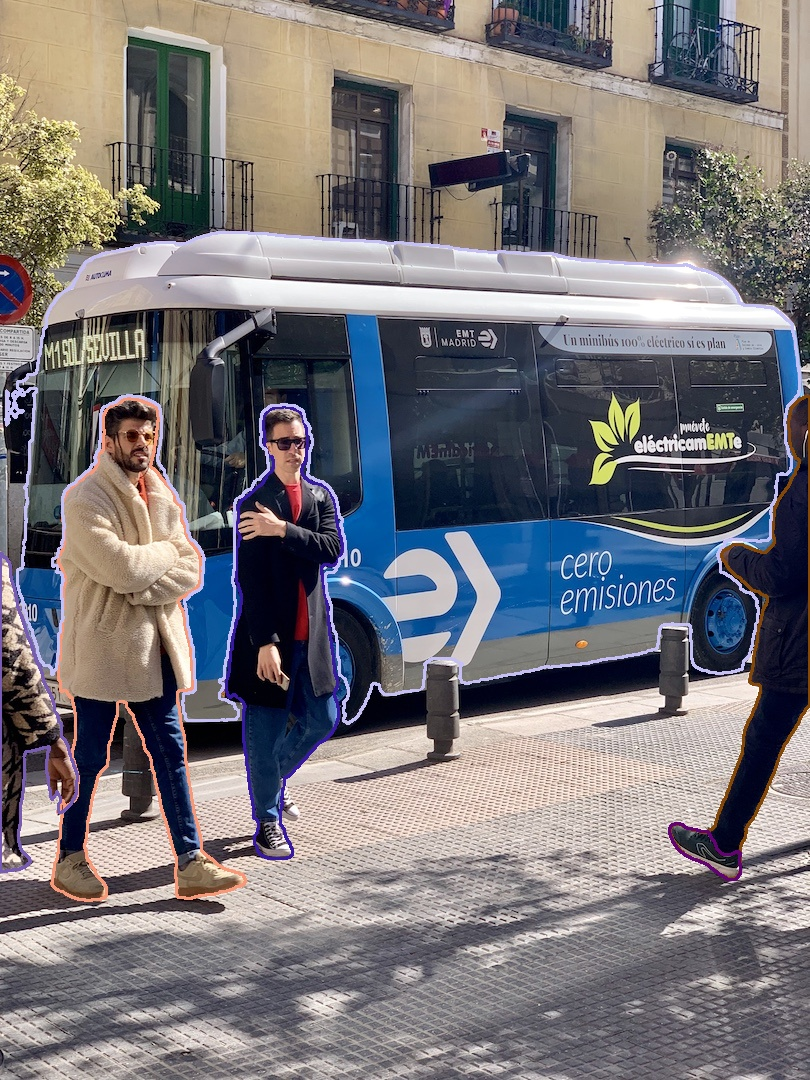

In [10]:
import cv2
import numpy as np
from random import randint
from IPython.display import display, Image

with open('../images_labels/sample.txt', 'r') as f:
    labels = f.read().splitlines()
img = cv2.imread('../images/sample.jpg')
h,w = img.shape[:2]

for label in labels:
    class_id, *poly = label.split(' ')

    poly = np.asarray(poly,dtype=np.float16).reshape(-1,2) # Read poly, reshape
    poly *= [w,h] # Unscale

    cv2.polylines(img, [poly.astype('int')], True, (randint(0,255),randint(0,255),randint(0,255)), 2) # Draw Poly Lines
    # cv2.fillPoly(img, [poly.astype('int')], (randint(0,255),randint(0,255),randint(0,255)), cv2.LINE_AA) # Draw area


_, buf = cv2.imencode(".jpg", img)
display(Image(data=buf.tobytes()))


In [8]:
with (open("./label.txt", "r", encoding="utf-8")) as f:
    labels = f.readlines()

with open("./new_label.txt", "w") as f:
    for label in labels:
        if label.startswith("15 "):
            f.write("0" + label[2:])
        else:
            continue



image 1/1 c:\Users\hamada\workspace\labo\segmentation\notebooks\test.jpg: 480x640 1 cat, 1 suitcase, 56.0ms
Speed: 4.0ms preprocess, 56.0ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)
Results saved to c:\Users\hamada\workspace\labo\segmentation\runs\detect\predict
1 label saved to c:\Users\hamada\workspace\labo\segmentation\runs\detect\predict\labels


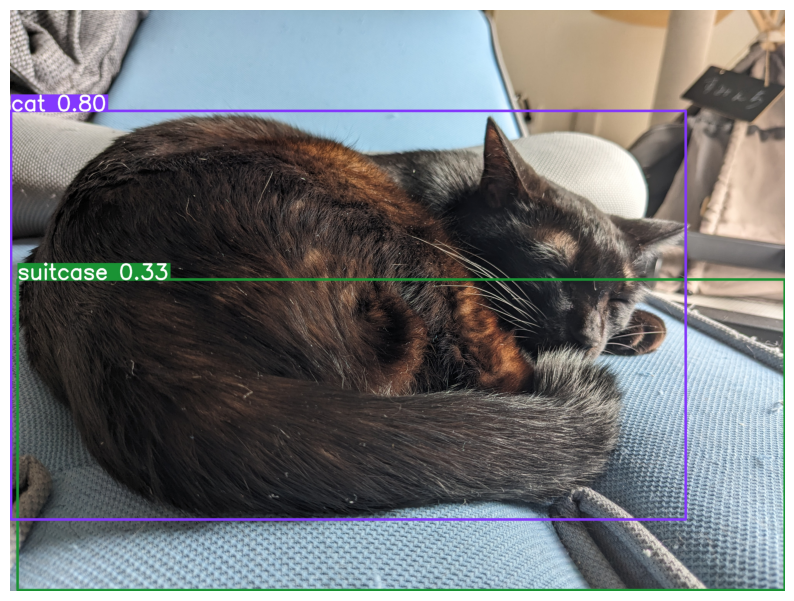

In [11]:
# image_path = 'https://ultralytics.com/images/bus.jpg'
image_path = "./test.jpg"

# save = True にすることで結果を画像で保存する
results = model(image_path, save=True, save_txt=True)

import matplotlib.pyplot as plt
from pathlib import Path

# get filename
filename = Path(results[0].path).name

result_image = cv2.imread(f"{results[0].save_dir}/{filename}")
result_image = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(result_image)
plt.axis('off')
plt.show()

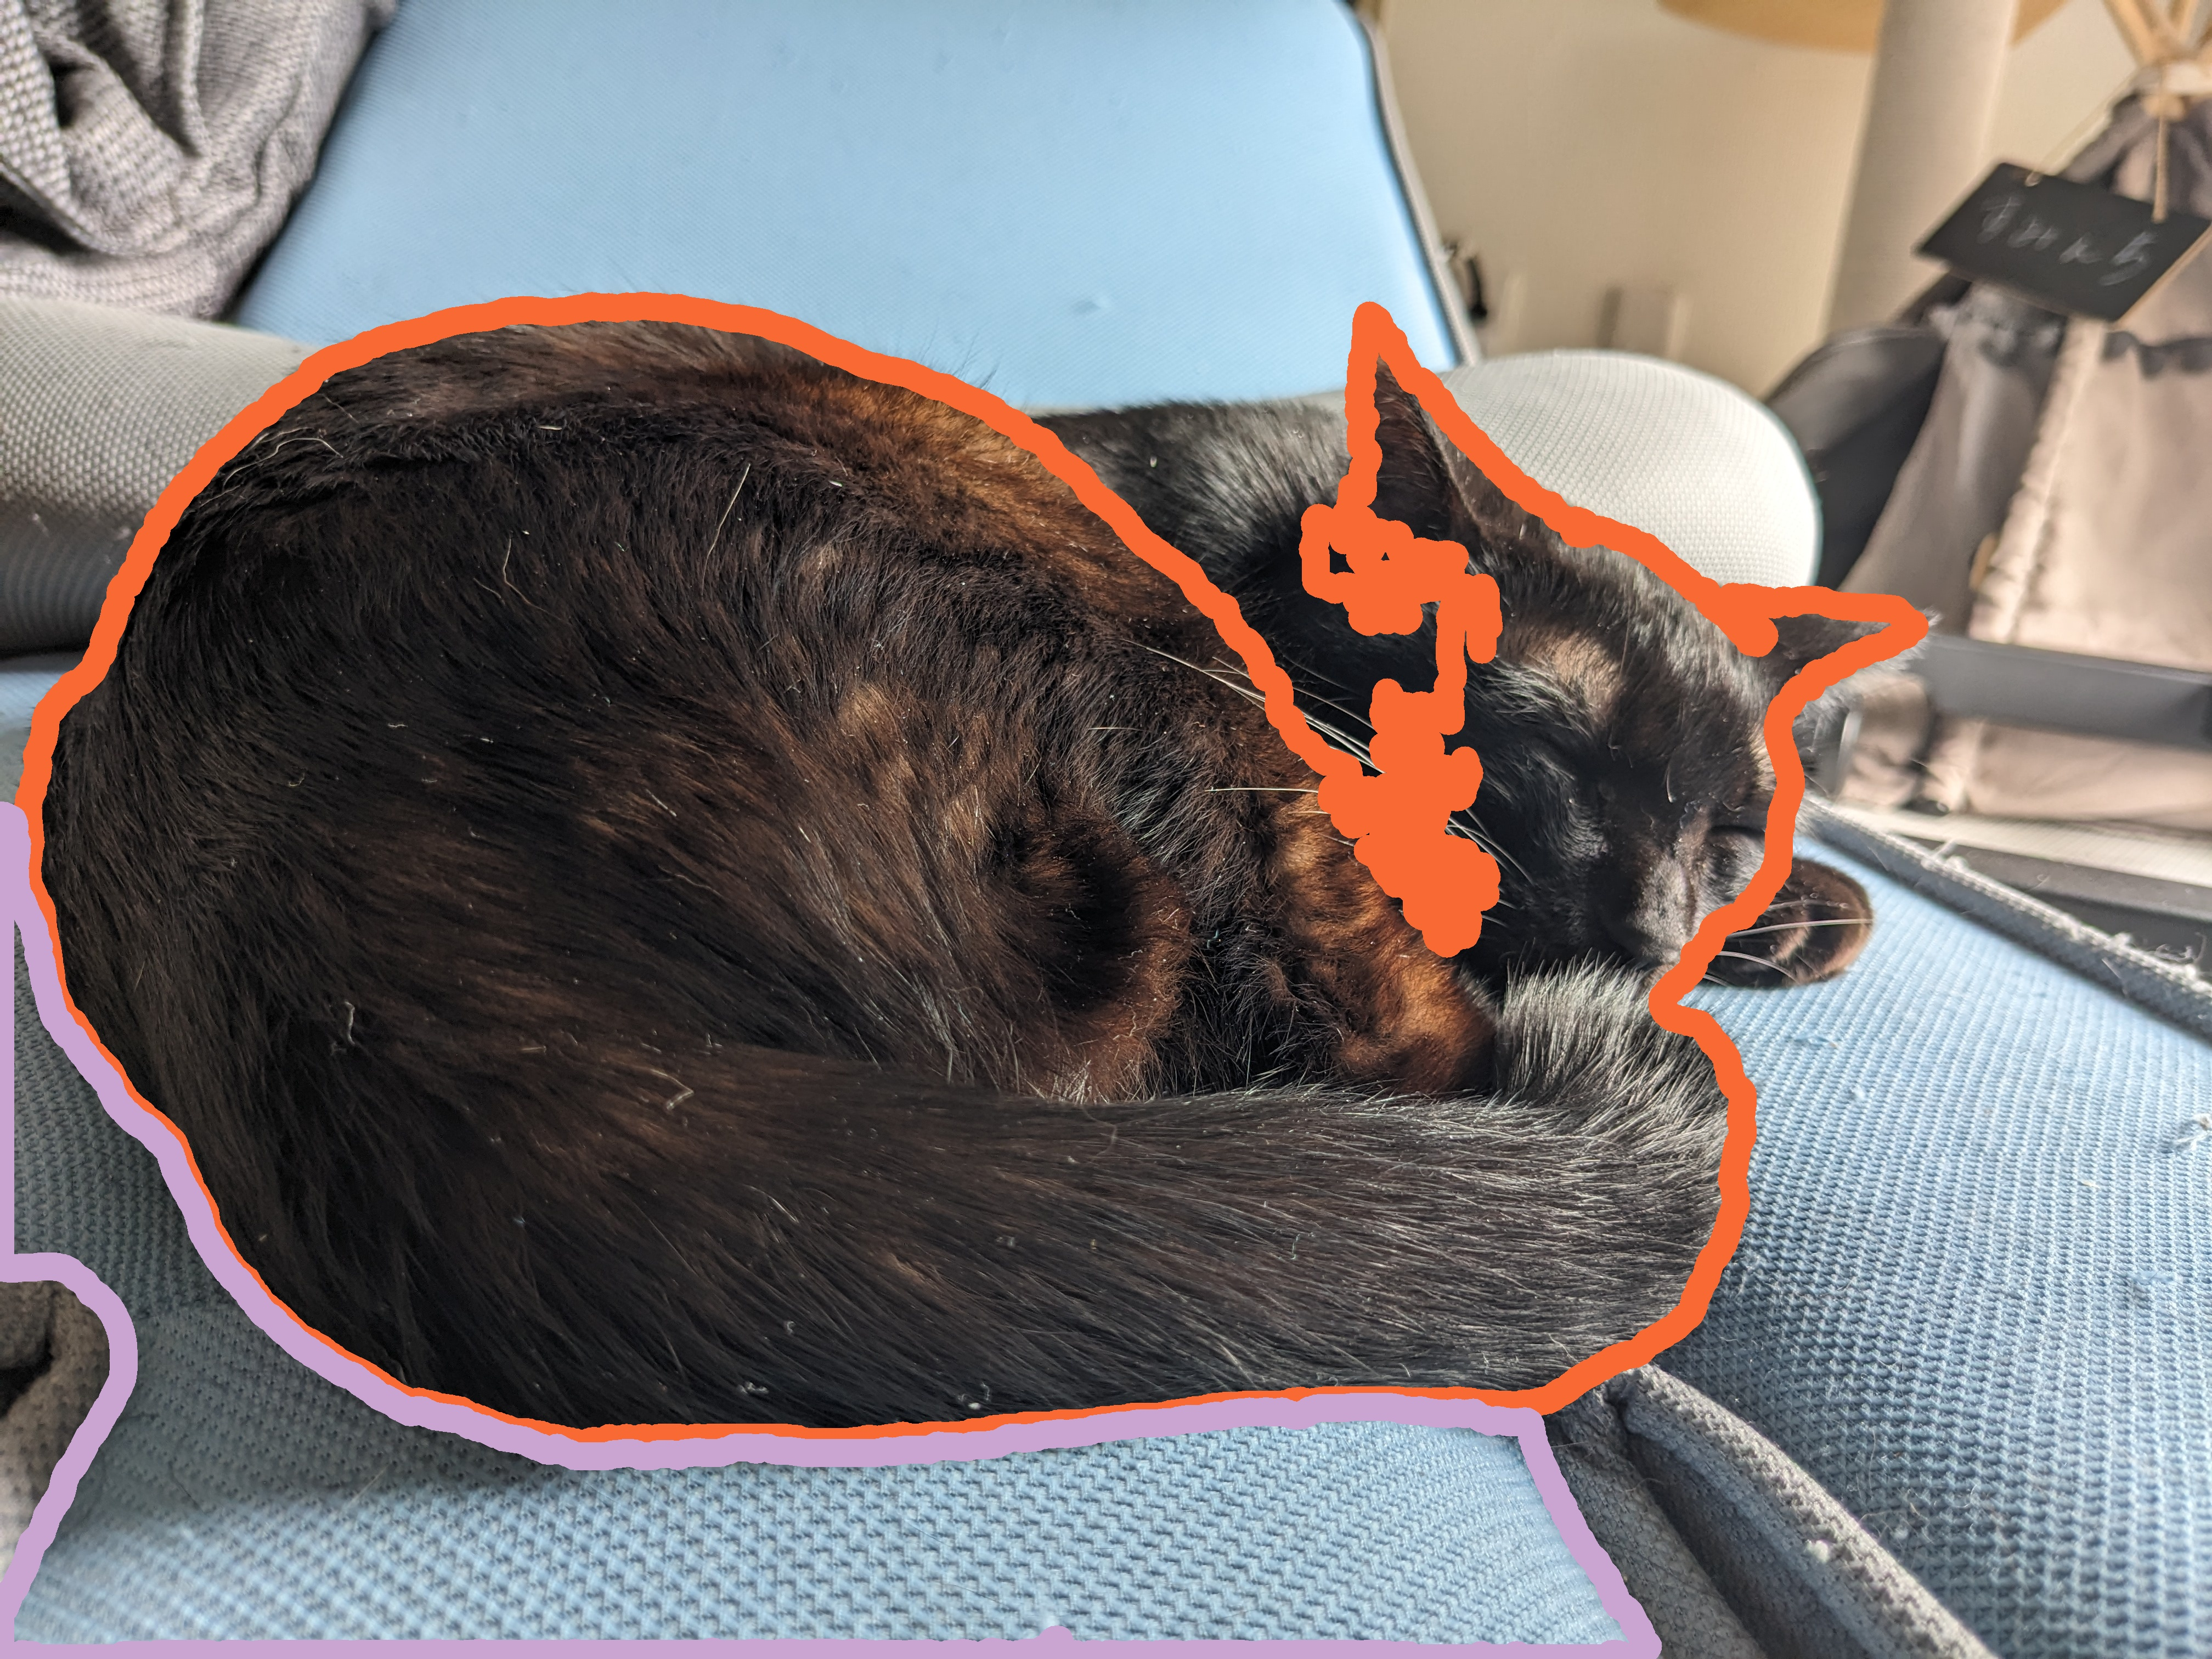

In [15]:
import cv2
import numpy as np
from random import randint
from IPython.display import display, Image

with open('./label.txt', 'r') as f:
    labels = f.read().splitlines()
img = cv2.imread('./test.jpg')
h,w = img.shape[:2]

for label in labels:
    class_id, *poly = label.split(' ')

    poly = np.asarray(poly,dtype=np.float16).reshape(-1,2) # Read poly, reshape
    poly *= [w,h] # Unscale

    cv2.polylines(img, [poly.astype('int')], True, (randint(0,255),randint(0,255),randint(0,255)), 50) # Draw Poly Lines
    # cv2.fillPoly(img, [poly.astype('int')], (randint(0,255),randint(0,255),randint(0,255)), cv2.LINE_AA) # Draw area


_, buf = cv2.imencode(".jpg", img)
display(Image(data=buf.tobytes()))
